# Lecture 3: Basic Monte Carlo - Integration, sampling and error estimation
AM207: Verena Kaynig-Fittkau,and Pavlos Protopapas, Harvard University


In [1]:
%matplotlib inline
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('talk')

C:\Users\vkaynig\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Estimate the area of a unit circle

Area of the circle =  3.1468
pi =  3.14159265359


C:\Users\vkaynig\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\vkaynig\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


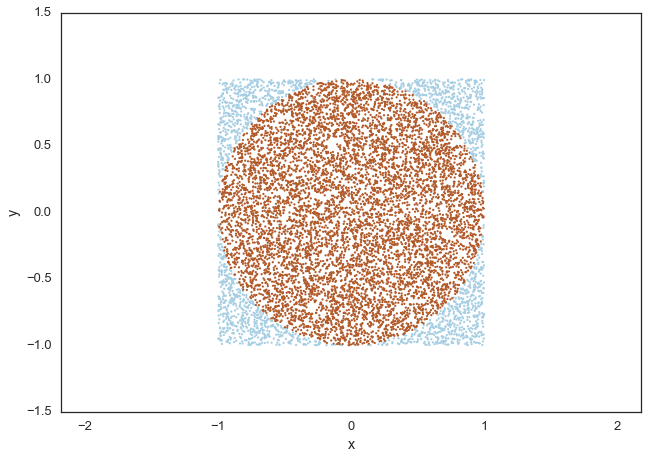

In [26]:
#area of the bounding box
box_area = 4.0    

#number of samples
N_total = 10000.0 

#drawing random points uniform between -1 and 1
X = np.random.uniform(low=-1, high=1, size=N_total)  
Y = np.random.uniform(low=-1, high=1, size=N_total)   

# calculate the distance of the point from the center 
distance = np.sqrt(X**2+Y**2);  
 
# check if point is inside the circle    
is_point_inside = distance<1.0

# sum up the hits inside the circle
N_inside=np.sum(is_point_inside)

# estimate the circle area
circle_area = box_area * N_inside/N_total

# some nice visualization
plt.scatter(X,Y, c=is_point_inside, s=5.0, edgecolors='none', cmap=plt.cm.Paired)  
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')

# text output
print "Area of the circle = ", circle_area
print "pi = ", np.pi

# Crude Monte Carlo 
**Calculate the integral $ I= \int_{2}^{3} [x^2 + 4 \, x \,\sin(x)] \, dx. $**

**For testing we can use the anti-derivative $ \frac{x^3}{3} + 4\sin(x) -4x\cos(x). $ **

To solve this using MC, we draw $N$ random numbers from 2 to 3 and then take the average of all the values $f(x)=x^2 + 4 \, x \,\sin(x)$ and normalized over the volume; in this case the volume is 1 (3-2=1). 

In [3]:
# define f(x) for our integral
def f(x):
    return x**2 + 4*x*np.sin(x) 

# and the anti-derivative for testing
def anti_derivative_f(x): 
    return x**3/3.0+4.0*np.sin(x) - 4.0*x*np.cos(x) 

In [4]:
# upper and lower limits:
a = 2;    
b = 3; 

# use N draws 
N= 10000.0

#1. N values uniformly drawn from a to b 
X = np.random.uniform(low=a, high=b, size=N) 

#2. Compute f(X)
Y = f(X)   
# and the average
f_average = np.sum(Y)/ N

#3. estimate value of integral
estimate = (b-a) * f_average;

#we compute the exact value for testing
exact_val = anti_derivative_f(b) - anti_derivative_f(a)

print "Monte Carlo estimate = ",estimate
print "Exact value = ", exact_val

Monte Carlo estimate =  11.814256144
Exact value =  11.8113589251


C:\Users\vkaynig\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


### Mutlidimensional example:

**Calculate the integral $I=\int \int f(x, y) dx dy$ **

where $f(x,y) = x^2 +y^2$ 

over the region deﬁned by the condition $x^2 +y^2 ≤ 1$. 

The steps are the same as above, but we need an additional check that the region condition is fulfilled by our random samples.

In [5]:
#define our f(x,y)
f_circle = lambda x,y: x**2 + y**2

# use N draws 
N= 10000

#sample X and Y
X= np.random.uniform(low=-1, high=1, size=N) 
Y= np.random.uniform(low=-1, high=1, size=N) 

# calculate f(x) 
f_value = f_circle(X, Y)  

# reject all samples that do not satisfy our region condition
N = np.sum(f_value<1) 

f_average = np.sum(f_value[f_value<1]) / N

print "Monte Carlo estimate = ", np.pi*f_average
print "Exact value", np.pi/2.0

Monte Carlo estimate =  1.60789020844
Exact value 1.57079632679


### Error estimate

How does the accuracy depend on the number of points(samples)? Lets try the same 1-D integral $ I= \int_{2}^{3} [x^2 + 4 \, x \,\sin(x)] \, dx $ as a function of the number of points. 

(0, 0.2)

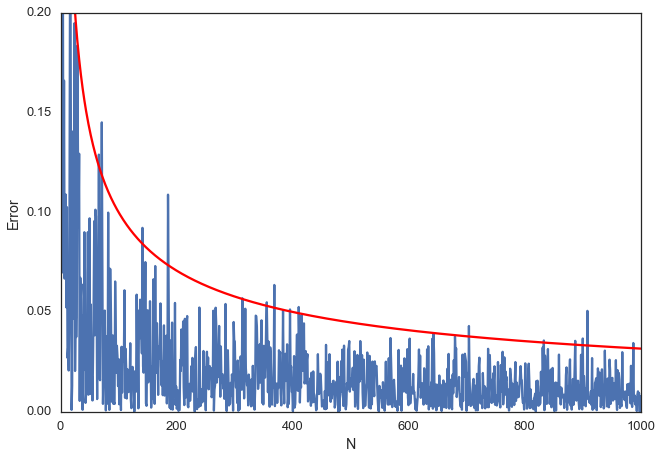

In [6]:
# space to save estimates for different N
estimates = np.zeros(1000)
# upper and lower limits:
a = 2;    
b = 3; 

exactval= anti_derivative_f(b)-anti_derivative_f(a)

for N in np.arange(0,1000):
    # N values uniformly drawn from a to b 
    X = np.random.uniform(low=a, high=b, size=N) 
    Y =f(X)   # calculate f(x) 
    estimates[N]= (b-a) * np.sum(Y)/ N;
    
errors = np.abs(estimates - exactval)
    
plot_points = np.linspace(0,1000,1000)   

plt.plot(plot_points, errors)
plt.plot(plot_points, 1/np.sqrt(plot_points), 'r')

plt.xlabel("N")
plt.ylabel("Error")
plt.ylim(0,0.2)

Our errors follow a normal distribution, and the variance of this distribution can be seen by plotting the histogram:

Mean:  1.3702491182
Standard deviation:  0.0134330390232


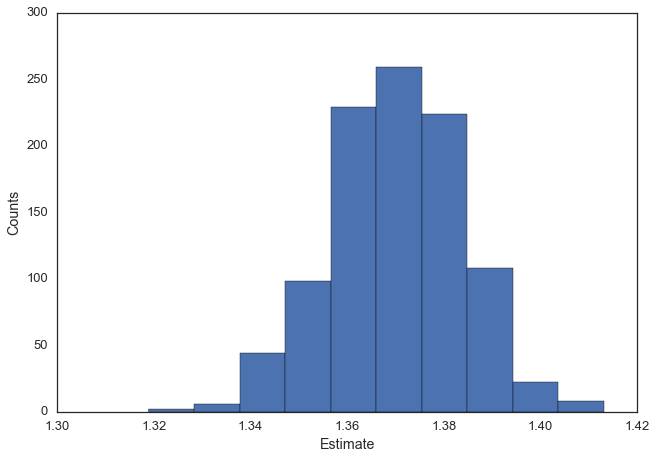

In [27]:
# multiple MC estimations
m=1000
N=1000

estimates = np.zeros(m)


for i in np.arange(0,m):    
    X = np.random.uniform(low=a, high=b, size=N) # N values uniformly drawn from a to b 
    Y =f(X)   # calculate f(x)

    estimates[i]= (b-a) * np.sum(Y)/ N;
    
    
plt.hist(estimates)
plt.xlabel("Estimate")
plt.ylabel("Counts")
print "Mean: ", np.mean(estimates)
print "Standard deviation: ", np.std(estimates)


### Importance sampling: 

**Calculate $\int_{0}^{\pi} \sin(x) \, x \, dx $**

The function has a shape that is similar to Gaussian and therefore we choose here a Gaussian as importance sampling distribution. 


Exact solution is:  3.14159265359

Mean basic MC estimate:  3.14271610764
Standard deviation of our estimates:  0.0624302748684

Mean importance sampling MC estimate:  3.14170867539
Standard deviation of our estimates:  0.0164084663451



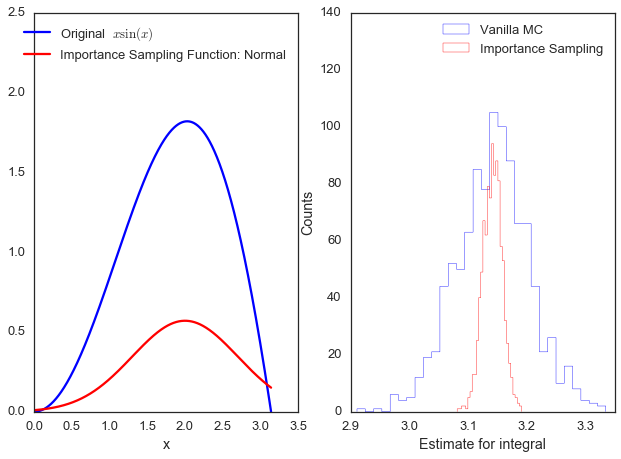

In [28]:
# parameters for our normal distribution
# that we want to sample from
mu = 2;
sig = 0.7

f = lambda x: np.sin(x)*x
anti_derivative_f = lambda x: np.sin(x)-x*np.cos(x)

p = lambda x: (1/np.sqrt(2*np.pi*sig**2))*np.exp(-(x-mu)**2/(2.0*sig**2))
normfun = lambda x:  norm.cdf(x-mu, scale=sig)

h = lambda x: f(x) / p(x)

# range of integration
xmin = 0
xmax = np.pi

# Number of draws 
N = 1000

# plot the functions
x=np.linspace(xmin, xmax, 1000)
plt.subplot(1,2,1)
plt.plot(x, f(x), 'b', label=u'Original  $x\sin(x)$')
plt.plot( x, p(x), 'r', label=u'Importance Sampling Function: Normal')
plt.xlabel('x')
plt.ylim(0,2.5)
plt.legend()

# =============================================
# EXACT SOLUTION 
# =============================================
Iexact = anti_derivative_f(xmax)-anti_derivative_f(xmin)
print "Exact solution is: ", Iexact
print

# ============================================
# VANILLA CRUDE MONTE CARLO 
# ============================================
# We do 1000 estimates to get our estimation error
Ivmc = np.zeros(1000)
for k in np.arange(0,1000):
    x = np.random.uniform(low=xmin, high=xmax, size=N)
    Ivmc[k] = (xmax-xmin)*np.mean(f(x))
    
print "Mean basic MC estimate: ", np.mean(Ivmc)
print "Standard deviation of our estimates: ", np.std(Ivmc)
print


# ============================================
# IMPORTANCE SAMPLING 
# ============================================
# We choose a Gaussian so it similar to the original function

Iis = np.zeros(1000)
for k in np.arange(0,1000):
    # draw from a normal distribution 
    xis = mu + sig*np.random.randn(N,1);
    # make sure samples are in our range
    xis = xis[ (xis<xmax) & (xis>xmin)] ;

    # normalization for Gaussian from 0..pi
    normal = normfun(np.pi)-normfun(0);
    # computing our estimates
    Iis[k] = np.mean(f(xis)/p(xis))*normal;
 
print "Mean importance sampling MC estimate: ", np.mean(Iis)
print "Standard deviation of our estimates: ", np.std(Iis)
print

plt.subplot(1,2,2)
plt.hist(Ivmc, 30, color='b', histtype='step', label=u'Vanilla MC');
plt.hist(Iis,30, color='r', histtype='step', label=u'Importance Sampling');
plt.ylim(0,140) 
plt.xlabel("Estimate for integral")
plt.ylabel("Counts")
plt.legend()
plt.show()

To better see that we did reduce the variance by using importance sampling, let's also plot the resulting function $h(x) = \frac{f(x)}{p(x)}$:

Variance for f(x):  0.392602557626
Variance for h(x):  0.252739414364


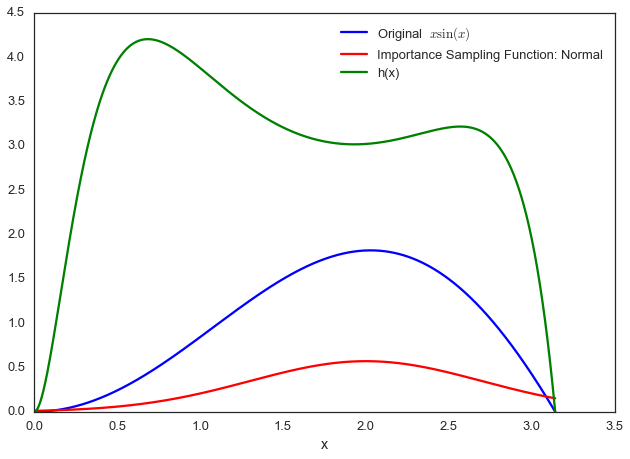

In [25]:
# plot the functions
x=np.linspace(xmin, xmax, 1000)
plt.plot(x, f(x), 'b', label=u'Original  $x\sin(x)$')
plt.plot( x, p(x), 'r', label=u'Importance Sampling Function: Normal')
plt.plot( x, h(x) * normal, 'g', label=u'h(x)')
plt.xlabel('x')
#plt.ylim(0,2.5)
plt.legend()

x = np.random.uniform(low=xmin, high=xmax, size=10000)
print "Variance for f(x): ", np.var(f(x))

x = mu + sig*np.random.randn(10000,1)
x = x[ (x<xmax) & (x>xmin)] 
print "Variance for h(x): ", np.var(h(x) * normal)

### Inverse transform example
**Draw from the distribution $f(x) \sim \exp{(-x)}$**

The following code will produce numbers that follow the $\exp{(-x)}$ distribution. The figure
generated by code below shows the resulting histogram of the generated numbers
compared to the actual $\exp{(-x)}$.

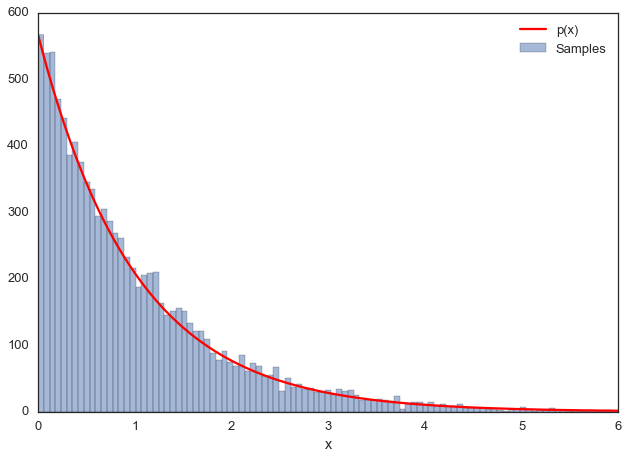

In [29]:
# probability distribution we're trying to calculate
p = lambda x: np.exp(-x)

# CDF of p
CDF = lambda x: 1-np.exp(-x)

# invert the CDF
invCDF = lambda x: -np.log(1-x)

# domain limits
xmin = 0 # the lower limit of our domain
xmax = 6 # the upper limit of our domain

# range limits
rmin = CDF(xmin)
rmax = CDF(xmax)

N = 10000 # the total of samples we wish to generate

# generate uniform samples in our range then invert the CDF
# to get samples of our target distribution
R = np.random.uniform(rmin, rmax, N)
X = invCDF(R)

# get the histogram info
hinfo = np.histogram(X,100)

# plot the histogram
plt.hist(X,bins=100, label=u'Samples', alpha=0.5);

# plot our (normalized) function
xvals=np.linspace(xmin, xmax, 1000)
plt.plot(xvals, hinfo[0][0]*p(xvals), 'r', label=u'p(x)')
plt.xlabel("x")
# turn on the legend
plt.legend()

### Rejection sampling example:
The following code produces samples that follow the distribution $P(x)=e^{-x}$ 
  for $x=[0,10]$ and generates a histogram of the sampled distribution. 

Total samples drawn:  98874
Number of accepted samples:  10000


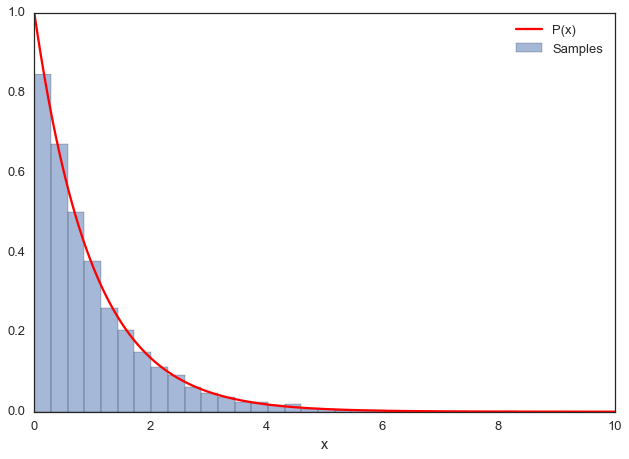

In [30]:
P = lambda x: np.exp(-x)

# domain limits
xmin = 0 # the lower limit of our domain
xmax = 10 # the upper limit of our domain

# range limit (supremum) for y
ymax = 1

N = 10000 # the total of samples we wish to generate
accepted = 0 # the number of accepted samples
samples = np.zeros(N)
count = 0 # the total count of proposals

# generation loop
while (accepted < N):
    
    # pick a uniform number on [xmin, xmax) (e.g. 0...10)
    x = np.random.uniform(xmin, xmax)
    
    # pick a uniform number on [0, ymax)
    y = np.random.uniform(0,ymax)
    
    # Do the accept/reject comparison
    if y < P(x):
        samples[accepted] = x
        accepted += 1
    
    count +=1
    
print "Total samples drawn: ",count
print "Number of accepted samples: ", accepted

# get the histogram info
hinfo = np.histogram(samples,30)

# plot the histogram
plt.hist(samples,bins=30, label=u'Samples', alpha=0.5, normed=True);

# plot our (normalized) function
xvals=np.linspace(xmin, xmax, 1000)
plt.plot(xvals, P(xvals), 'r', label=u'P(x)')
plt.xlabel("x")
# turn on the legend
plt.legend()

** The same on steroids **

23965 10000


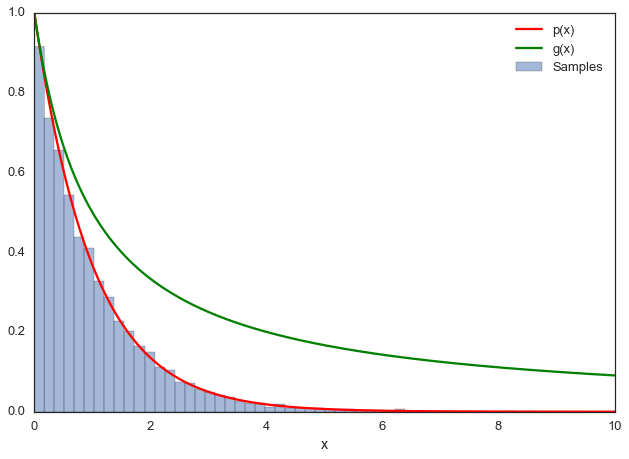

In [31]:

p = lambda x: np.exp(-x)  # our distribution
g = lambda x: 1/(x+1)  # our proposal pdf (we're thus choosing M to be 1)
invCDFg = lambda x: np.log(x +1) # generates our proposal using inverse sampling

# domain limits
xmin = 0 # the lower limit of our domain
xmax = 10 # the upper limit of our domain

# range limits for inverse sampling
umin = invCDFg(xmin)
umax = invCDFg(xmax)

N = 10000 # the total of samples we wish to generate
accepted = 0 # the number of accepted samples
samples = np.zeros(N)
count = 0 # the total count of proposals

# generation loop
while (accepted < N):
    
    # Sample from g using inverse sampling
    u = np.random.uniform(umin, umax)
    xproposal = np.exp(u) - 1
    
    # pick a uniform number on [0, 1)
    y = np.random.uniform(0,1)
    
    # Do the accept/reject comparison
    if y < p(xproposal)/g(xproposal):
        samples[accepted] = xproposal
        accepted += 1
    
    count +=1
    
print count, accepted

# get the histogram info
hinfo = np.histogram(samples,50)

# plot the histogram
plt.hist(samples,bins=50, label=u'Samples', alpha=0.5, normed=True);

# plot our (normalized) function
xvals=np.linspace(xmin, xmax, 1000)
plt.plot(xvals, p(xvals), 'r', label=u'p(x)')
plt.plot(xvals, g(xvals), 'g', label=u'g(x)')
plt.xlabel("x")
# turn on the legend
plt.legend()
